# Open Machine Learning Course
## Topic 1. Exploratory data analysis with Pandas

### Original article
[Source](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-1-exploratory-data-analysis-with-pandas-de57880f1a68)

Goal: Quickly refresh the knowledge and help to find topics for further advancement.

Prerequisites: 
+ basics concepts from calculus
+ linear algebra
+ probability theory
+ statistics

### Introduction
Pandas is a Python library that provides extensive means for Data Analysis. Data Scientists often work with data stored in table formats, like .csv, .tsv, or .xlsx. Pandas makes it very convenient to **load, process, and analyze** such tabular data using SQL-like queries. In conjuction with Mathplotlib and Seaborn, Pandas provides a wide range of opportunities for visual analysis of tabular data.

The main data structures in Pandas are implemented with **Series** and **DataFrame** classes. The former is a one-dimensional indexed array (a vector) of some fixed data type. The latter is a two-dimensioanl data structure (a table) where each column contains data of the same type. You can see it as a dictionary of Series instances. DataFrames are great for representing real data: rows correspond to instances (objects, observations, examples, etc.), and columns correspond to features of the instances

### Dataset
[Churn in Telecom's dataset](https://bigml.com/dashboard/dataset/5a88c0e5eba31d640d002392)
Info:
+ 21 fields
+ 3,333 instances

[More datasets](http://archive.ics.uci.edu/ml/datasets.html)

### Main `Pandas` methods

In [1]:
import pandas as pd
import numpy as np

In [66]:
dataset = "../Datasets/telecom_churn.csv"
df = pd.read_csv(dataset)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Each row corresponds to one **instance**, the object of our research, and each column represents **features** of the object.

In [67]:
#Data dimensionality
print(df.shape)

(3333, 21)


In [68]:
#Feature names
print(df.columns)

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


In [69]:
#General information about the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

In the third column, `object`, `int64`, `float64`, and `bool` are the data types of our features. In total:
+ 1 bool
+ 8 float64
+ 8 int64
+ 4 object

The **churn rate**, also known as the **rate of attrition**, is the percentage of subscribers to a service who discontinue their subscriptions to that service within a given time period. For a company to expand its clientele, its growth rate, as measured by the number of new customers, must exceed its churn rate.

In [78]:
#Changing the column type of feature 'Churn' with 'astype' method
df['churn'] = df['churn'].astype('int64')

df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


The `describe` method shows basic statistical characteristics of each numerical feature:
+ non-missing values
+ mean
+ standar deviation
+ range
+ median
+ quartiles

In [79]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In order to see statistics on non-numerical features, one has to explicity indicate data types of interest in the `include` parameter.

In [80]:
df.describe(include=['object', 'bool'])

,state,phone number,international plan,voice mail plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,383-5109,no,no
freq,106,1,3010,2411


For categorical (type `object`) and boolean (type `bool`) features we can use the `value_counts` method

In [81]:
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

2850 users out of 3333 are loyal and their value es `0`. To calculate the portion, we use `normalizer=True` in the `value_counts` function

In [82]:
df['churn'].value_counts(normalize=True)

0    0.855086
1    0.144914
Name: churn, dtype: float64

### Sorting

A DataFrame can be sorted by the value of one of the variables a.k.a. columns. To sort in descending order we use `ascending=False` in `sort_values` function.

In [83]:
df.sort_values(by='total day charge', ascending=False).head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
365,CO,154,415,343-5709,no,no,0,350.8,75,59.64,...,94,18.40,253.9,100,11.43,10.1,9,2.73,1,1
985,NY,64,415,345-9140,yes,no,0,346.8,55,58.96,...,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1
2594,OH,115,510,348-1163,yes,no,0,345.3,81,58.70,...,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
156,OH,83,415,370-9116,no,no,0,337.4,120,57.36,...,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
605,MO,112,415,373-2053,no,no,0,335.5,77,57.04,...,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1


Alternatively, we can sort by multiple columns.

In [84]:
df.sort_values(by=['state', 'total day minutes'], ascending=[False, True]).head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1076,WY,53,415,337-4339,no,yes,27,25.9,119,4.40,...,96,17.55,228.1,64,10.26,6.5,7,1.76,1,0
1999,WY,160,408,338-7232,no,no,0,82.7,116,14.06,...,95,16.54,159.0,54,7.15,10.9,9,2.94,0,0
238,WY,215,510,393-9619,no,no,0,83.6,148,14.21,...,91,10.28,226.6,110,10.20,10.7,9,2.89,0,0
1689,WY,90,408,368-3931,no,yes,39,94.8,89,16.12,...,91,18.62,197.4,65,8.88,11.4,5,3.08,1,0
1423,WY,127,415,412-3726,yes,yes,28,95.9,117,16.30,...,131,13.56,152.8,132,6.88,10.4,3,2.81,1,0


### Indexing and retrieving data

DAtaFrame can be indexed in differents ways. To get a single column, we can use a `DataFrame['name']` construction.

Let's use this to answer a question about that column alone: **what is the portion of churned users in our dataframe?**

In [85]:
df['churn'].mean()

0.14491449144914492

**Boolean indexing** with one column is also very convenient. The sintazys is `DataFrame[P(DataFrame['Name'])]`, where `P` is some logical condition that is cheched for each element of the `Name` column. The result of indexing is the DataFrame consisting only of rows that satisfy the `P`condition on the `Name` column.

Let's use it to answer the question: **what are average values of numerical variables for churned users?**

In [86]:
df[df['churn'] == 1].mean()

account length            102.664596
area code                 437.817805
number vmail messages       5.115942
total day minutes         206.914079
total day calls           101.335404
total day charge           35.175921
total eve minutes         212.410145
total eve calls           100.561077
total eve charge           18.054969
total night minutes       205.231677
total night calls         100.399586
total night charge          9.235528
total intl minutes         10.700000
total intl calls            4.163561
total intl charge           2.889545
customer service calls      2.229814
churn                       1.000000
dtype: float64

**How much time, on average, do churned users spend on phone during daytime?**

In [87]:
df[df['churn'] == 1]['total day minutes'].mean()

206.91407867494814

**What is the maximum length of the international calls among loyal users who do not have an international plan?**

Tip: the loyal users are `churn==0`

In [88]:
df[(df['churn'] == 0) & (df['international plan'] == 'no')]['total intl minutes'].max()

18.899999999999999

DataFrames can be indexed by column name a.k.a. **label**, or row name a.k.a. **index**. 


The `loc` method is used for **indexing by name** in columns, while `iloc` is used for **indexing by number** in rows. 

Case 1:

*Give us the values of the rows with index from 0 to 5 (inclusive) and columns labeled from 'state' to 'area code' (inclusive) *

In [89]:
df.loc[0:5, 'state':'area code']

,state,account length,area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510


Case 2:

*Give us the values of the first five rows in the first three columns*

Note: in Python slice, the maximal value is not included

In [90]:
df.iloc[0:5, 0:3]

,state,account length,area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415


If we need the first or last line of the DataFrame, we use the `df[:1]` or `df[-1]` syntax

### Applying Functions to Cells, Columns and Rows

To apply functions to each column, use `apply()`

In [91]:
df.apply(np.max)

state                           WY
account length                 243
area code                      510
phone number              422-9964
international plan             yes
voice mail plan                yes
number vmail messages           51
total day minutes            350.8
total day calls                165
total day charge             59.64
total eve minutes            363.7
total eve calls                170
total eve charge             30.91
total night minutes            395
total night calls              175
total night charge           17.77
total intl minutes              20
total intl calls                20
total intl charge              5.4
customer service calls           9
churn                            1
dtype: object

The `apply` method can also be used to apply a function to each line. To do this, specify `axis=1`. `Lamda` functions are very convenient in such scenarios. 

`Lambda` functions are anonymous functions.

Example:

*Select all states starting with W*

In [92]:
df[df['state'].apply(lambda state: state[0] == 'W')].head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
26,WY,57,408,357-3817,no,yes,39,213.0,115,36.21,...,112,16.24,182.7,115,8.22,9.5,3,2.57,0,0
44,WI,64,510,352-1237,no,no,0,154.0,67,26.18,...,118,19.19,265.3,86,11.94,3.5,3,0.95,1,0
49,WY,97,415,405-7146,no,yes,24,133.2,135,22.64,...,58,18.46,70.6,79,3.18,11.0,3,2.97,1,0
54,WY,87,415,353-3759,no,no,0,151.0,83,25.67,...,116,18.67,203.9,127,9.18,9.7,3,2.62,5,1


The `map` method can be used to *replace values in a column* by passing a dictionary of the form `{old_value: new_value}` as its argument



In [114]:
dictionary = {"yes": True, "no": False}

df_copy = df.copy()
df_copy['international plan'] = df['international plan'].map(dictionary)

df_copy.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,False,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,False,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,False,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,True,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,True,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


The same thing can be done with `replace` method

In [118]:
dictionary = {"yes": True, "no": False}

df_copy = df.copy()
df_copy = df_copy.replace({'international plan': dictionary})

df_copy.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,False,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,False,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,False,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,True,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,True,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


### Grouping

In general, grouping data in Pandas goes as follows:
`df.groupby(by=grouping_columns)[columns_to_show].function()`

Where:
+ The `groupby` method divides the `grouping_columns`by their values. They become a new index in the resulting dataframe.
+ Columns of interest are selected with `columns_to_show`. If `columns_to_show` is not incluided, all non groupby clauses will be included.
+ One or several functions are applied to the obtained groups per selected columns.



Example:
*Group the data according the values of the `churn` variable and display statistics of three columns in each group*

In [122]:
columns_to_show = ['total day minutes', 'total eve minutes', 'total night minutes']

df.groupby(['churn'])[columns_to_show].describe(percentiles=[])

total day minutes                                            \
                  count        mean        std  min    50%    max   
churn                                                               
0                2850.0  175.175754  50.181655  0.0  177.2  315.6   
1                 483.0  206.914079  68.997792  0.0  217.6  350.8   

      total eve minutes                                             \
                  count        mean        std   min    50%    max   
churn                                                                
0                2850.0  199.043298  50.292175   0.0  199.6  361.8   
1                 483.0  212.410145  51.728910  70.9  211.3  363.7   

      total night minutes                                              
                    count        mean        std   min     50%    max  
churn                                                                  
0                  2850.0  200.133193  51.105032  23.2  200.25  395.0  
1                   483.0  205.231677  47.132825  47.4  204.80  354.9

In [124]:
columns_to_show = ['total day minutes', 'total eve minutes', 'total night minutes']

df.groupby(['churn'])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

total day minutes                        total eve minutes             \
                   mean        std amin   amax              mean        std   
churn                                                                         
0            175.175754  50.181655  0.0  315.6        199.043298  50.292175   
1            206.914079  68.997792  0.0  350.8        212.410145  51.728910   

                   total night minutes                          
       amin   amax                mean        std  amin   amax  
churn                                                           
0       0.0  361.8          200.133193  51.105032  23.2  395.0  
1      70.9  363.7          205.231677  47.132825  47.4  354.9

### Summary tables

Creating a **contingency table** using `crosstab` method.

Example:

*How the observations, in our sample, are distribuited in the context of two variables?*

In [125]:
pd.crosstab(df['churn'], df['international plan'])

international plan,no,yes
churn,,
0,2664,186
1,346,137


In [126]:
pd.crosstab(df['churn'], df['international plan'], normalize=True)

international plan,no,yes
churn,,
0,0.79928,0.055806
1,0.10381,0.041104


**Pivot tables** are implemented in Pandas with `pivot_table` method, and takes the following parameters:
+ `values`: a list of variables to calculate statistics for,
+ `index`: a list of variables to group data by,
+ `aggfunction`: what statistics needs to calculate fro groups (sum, mean, max, min, etc.)

Example:
*What is the average numbers of day, evening and night calls by area code*

In [127]:
calls_group = ['total day calls', 'total eve calls', 'total night calls']
df.pivot_table(calls_group, ['area code'], aggfunc='mean')

,total day calls,total eve calls,total night calls
area code,,,
408,100.496420,99.788783,99.039379
415,100.576435,100.503927,100.398187
510,100.097619,99.671429,100.601190


### Data Frame transformations

Adding columns to a DataFrame is doable in several ways.

Example:
*Calculate the number of calls for all users*

In [132]:
total_calls = df['total day calls'] + df['total eve calls'] \
+ df['total night calls'] + df['total intl calls']

df.insert(loc=len(df.columns), column='total calls', value=total_calls)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total calls
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,303
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,332
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,333
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,255
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,359


In [133]:
df['total charge'] = df['total day charge'] + df['total eve charge'] \
+ df['total night charge'] + df['total intl charge']

df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total calls,total charge
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,0,303,75.56
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,0,332,59.24
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,0,333,62.29
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,0,255,66.80
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,0,359,52.09


To delete the columns and rows use the `drop` method, passing the required indexes and the `axis` parameter:
+ `1` if you delete columns
+ `0` if you delete rows

The `inplace` argument tells wheter to change the original DataFrame:
+ `True` it alters the DataFrame
+ `False` if doesn't want change in the original DataFrame, and return a new one with dropped rows or columns


In [134]:
df.drop(['total charge', 'total calls'], axis=1, inplace=True)

df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [164]:
df_copy = df.copy()
df_copy = df_copy.drop([2,4,6], axis=0)

df_copy.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0


### First attemp on predicting telecom churn

We'll use `crosstab` contingency table and also through visual analysis with **Seaborn**, to see the relation between variables

Example:

*How `churn` rate is related to `international plan` variable?*

In [165]:
pd.crosstab(df['churn'], df['international plan'], margins=True)

international plan,no,yes,All
churn,,,
0,2664,186,2850
1,346,137,483
All,3010,323,3333


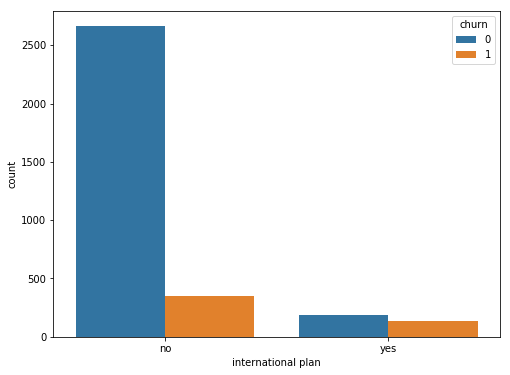

In [169]:
#some imports and 'magic' commands to set up plotting
%matplotlib inline 

import matplotlib.pyplot as plt 

#pip install seaborn
import seaborn as sns

plt.rcParams['figure.figsize'] = (8,6)
sns.countplot(x='international plan', hue='churn', data=df)

Example:

*How `churn` rate is related to `customer service calls` variable?*

In [170]:
pd.crosstab(df['churn'], df['customer service calls'], margins=True)

customer service calls,0,1,2,3,4,5,6,7,8,9,All
churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


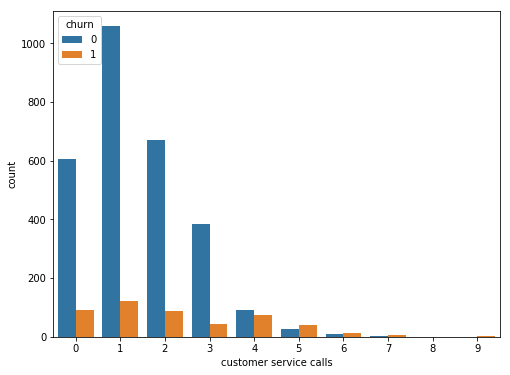

In [171]:
sns.countplot(x='customer service calls', hue='churn', data=df)

Example:

*How `churn` rate is related to `customer service calls` with at least 3 calls*

In [176]:
df['many service calls'] = (df['customer service calls'] > 3).astype('int64')
pd.crosstab(df['many service calls'], df['churn'], margins=True)

churn,0,1,All
many service calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


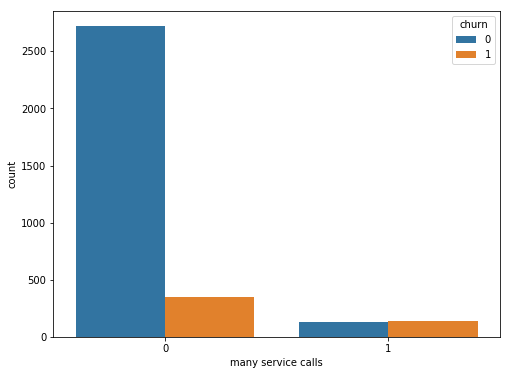

In [177]:
sns.countplot(x='many service calls', hue='churn', data=df)

Example:

*How `churn` rate is related to `many service calls` and `international plan`?*

In [194]:
df['many service calls and international plan']= (df['many service calls'] & df['international plan'])
pd.crosstab(df['many service calls and international plan'], df['churn'], margins=True)

churn,0,1,All
many service calls and international plan,,,
False,2721,345,3066
True,129,138,267
All,2850,483,3333


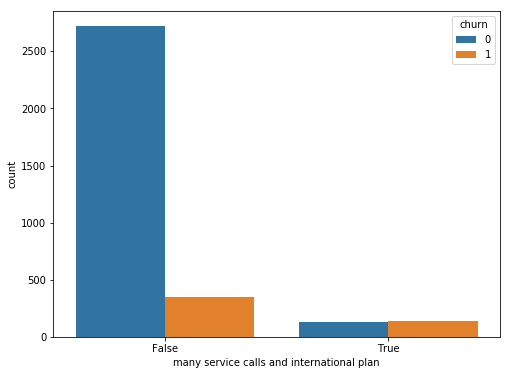

In [195]:
sns.countplot(x='many service calls and international plan', hue='churn', data=df)